<a href="https://colab.research.google.com/github/liicuba/gz-dbt-repository/blob/main/users_clean_devices_plan_by_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing google-cloud-bigquery libraries
!pip install google-cloud-bigquery

In [2]:
#Import the library bigquery
from google.cloud import bigquery

#Creates a BigQuery client
client = bigquery.Client()

In [3]:
#google colab auth.
from google.colab import auth
#import pandas library
import pandas as pd

#authenticate the user to access Google Cloud resources
auth.authenticate_user()

# Define the SQL query to retrieve all data from the 'devices' table and specify the project ID
query = "SELECT * FROM `neo-bank-432422.neo_bank.users_clean_devices`"
project = "neo-bank-432422"

# Use pandas to execute the SQL query and load the results into a Pandas DataFrame
# The `project_id` argument specifies the Google Cloud project
users_clean_devices_plan_by_age = pd.read_gbq(query=query, project_id=project)

In [4]:
users_clean_devices_plan_by_age

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,idade,brand,devices_brand
0,user_320,1940,NO,Fyllingsdalen,2018-01-25,0,STANDARD,0.0,0.0,1,0,0,84,Apple,Apple
1,user_16157,1941,JE,St Helier Jersey,2018-11-29,0,STANDARD,0.0,0.0,0,0,0,83,Apple,Apple
2,user_16541,1944,AT,Wien,2018-11-30,0,STANDARD,0.0,0.0,9,0,0,80,Apple,Apple
3,user_7147,1948,JE,St Helier Jersey,2018-06-07,0,STANDARD,0.0,0.0,0,0,0,76,Apple,Apple
4,user_17057,1949,AT,Feldkirch,2018-12-18,0,STANDARD,0.0,0.0,5,0,0,75,Apple,Apple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19425,user_14298,1993,SE,Stockholm,2018-10-20,1,STANDARD,1.0,1.0,25,0,0,31,Unknown,Unknown
19426,user_8872,1997,SE,Kullavik,2018-07-13,1,STANDARD,1.0,1.0,8,0,0,27,Unknown,Unknown
19427,user_8785,1999,SE,Karlstad,2018-07-09,1,STANDARD,1.0,1.0,0,0,0,25,Unknown,Unknown
19428,user_18966,1999,SE,Saltsjö-boo,2018-12-06,1,METAL,1.0,1.0,4,0,0,25,Unknown,Unknown


In [6]:

bins = [20, 30, 40, 50, 60, 70, 80, 90]  # Definindo os limites das faixas etárias
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']  # Rótulos para as faixas

# Criando a nova coluna 'age_group' com as faixas etárias
users_clean_devices_plan_by_age['age_group'] = pd.cut(users_clean_devices_plan_by_age['idade'], bins=bins, labels=labels, right=True)

# Exibindo as primeiras linhas do DataFrame para ver a nova coluna
users_clean_devices_plan_by_age.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,idade,brand,devices_brand,age_group
0,user_320,1940,NO,Fyllingsdalen,2018-01-25,0,STANDARD,0.0,0.0,1,0,0,84,Apple,Apple,81-90
1,user_16157,1941,JE,St Helier Jersey,2018-11-29,0,STANDARD,0.0,0.0,0,0,0,83,Apple,Apple,81-90
2,user_16541,1944,AT,Wien,2018-11-30,0,STANDARD,0.0,0.0,9,0,0,80,Apple,Apple,71-80
3,user_7147,1948,JE,St Helier Jersey,2018-06-07,0,STANDARD,0.0,0.0,0,0,0,76,Apple,Apple,71-80
4,user_17057,1949,AT,Feldkirch,2018-12-18,0,STANDARD,0.0,0.0,5,0,0,75,Apple,Apple,71-80


In [7]:
# Salvando o DataFrame em um arquivo CSV
users_clean_devices_plan_by_age.to_csv('users_clean_devices_age_group.csv', index=False)


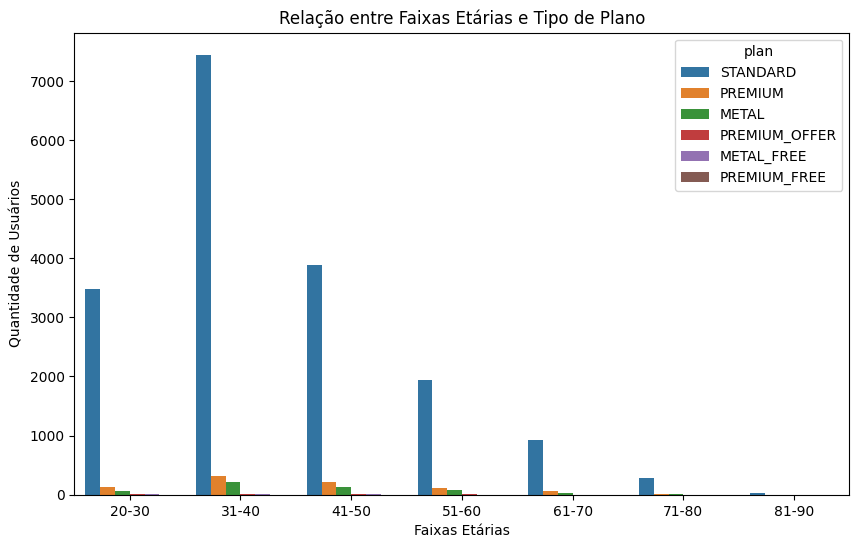

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando o gráfico de barras para mostrar a relação entre 'age_group' e 'plan'
plt.figure(figsize=(10, 6))
sns.countplot(data=users_clean_devices_plan_by_age, x='age_group', hue='plan')

# Adicionando título e rótulos aos eixos
plt.title('Relação entre Faixas Etárias e Tipo de Plano')
plt.xlabel('Faixas Etárias')
plt.ylabel('Quantidade de Usuários')

# Exibindo o gráfico
plt.show()